# Free energy computation from real data
*Cyril Rommens, s12495719, masterproject MSc Physics and Astronomy: Computational Physics of Complex Systems*

**Continue with free energy exploration**
To get the free energy from these functionals we need to implement $F(p) = U(p) - \Beta S(p)$, where $F(p)$ is the Helmholtz free energy, $U(p)$ the minimum internal energy, $S(p)$ the maximum Shannon entropy and $\Beta = \frac{1}{kT}$ the temperature relation. We want to compare the dynamics of the functionals, while keeping the temperature the same, so we can set $\Beta$ fixed at some constant. 

**Import libraries and functions**

In [1]:
# Basic data manipulation and visualisation libraries
import numpy as np
import matplotlib.pyplot as plt
import glob
import numpy as np
from scipy.optimize import minimize

In [6]:
# Import optimisation background functions
%run functionals.py

**Import data**

Generate an average connectivity matrix from the whole human connectome dataset.

In [2]:
# Importing all matrices with Numpy
matrices = [np.genfromtxt(file) for file in glob.glob('./1000_Functional_Connectomes/Connectivity matrices/*_matrix_file.txt')]

# Generate an averaged matrix
MatAv = np.zeros(shape=matrices[0].shape)
for matrix in matrices:
    MatAv += matrix
averaged_matrix = MatAv/len(matrices)

**Choose which data to use**

In [30]:
data = matrices[:10]

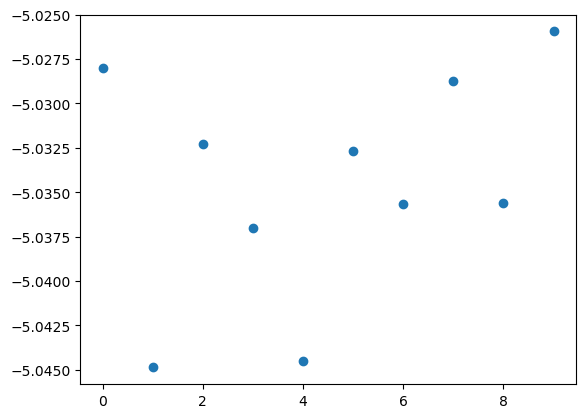

In [31]:
# Compute free energy vs time/subjects
energy_list = []

for i in range(len(data)):
    energy = free_energy(data[i], 1)
    energy_list.append(energy)

plt.scatter(list(range(len(data))), energy_list)
plt.show()

Try to sort the data to age

In [72]:
file_path = './1000_Functional_Connectomes/ages_list.txt'

try:
    with open(file_path, 'r') as file:
        # Read lines, convert to numeric values, and create a sorted list
        ages_list = np.array([float(line.strip()) for line in file.readlines()])
except FileNotFoundError:
    print(f"The file '{file_path}' does not exist.")
except ValueError as ve:
    print(f"Error: {ve}")
except Exception as e:
    print(f"An error occurred: {e}")

# Sort the list of ages and get the sorted indices
ages_list = ages_list[:810]
sorted_ages = np.array(sorted(ages_list))
indices = np.argsort(ages_list)

#print("Original Ages:", ages_list)
#print("Sorted Ages:", sorted_ages)
#print("Indices of Sorted Ages:", indices)

Original Ages: [23.   22.   36.   28.   22.   19.   21.   21.   21.   21.   29.   22.
 20.   19.   21.   21.   22.   23.   19.   38.   31.   35.   26.   25.
 28.   23.   22.   23.   32.   20.   28.   21.   24.   25.   22.   24.
 25.   26.   27.   24.   31.   23.   25.   21.   23.   23.   42.   34.
 22.   20.   38.   30.   26.   26.   24.   28.   23.   25.   24.   34.
 31.   26.   23.   44.   27.   34.   27.   24.   33.   26.   28.   26.
 28.   26.   26.   29.   31.   37.   37.   32.   39.   28.   29.   20.
 22.   20.   20.   20.   18.   20.   22.   19.   20.   20.   21.   22.
 22.   24.   22.   22.   24.   25.   21.   22.   20.   20.   20.   19.
 18.   20.   21.   19.   23.   20.   23.   22.   23.   23.   21.   21.
 21.   18.   20.   20.   26.   18.   22.   20.   21.   19.   24.   20.
 22.   26.   18.   22.   21.   24.   24.   21.   20.   22.   20.   19.
 19.   21.   21.   25.   22.   20.   22.   26.   18.   23.   21.   21.
 23.   19.   21.   26.   19.   24.   20.   23.   20.   19.   2

In [73]:
print(len(matrices))
print(len(indices))

# Use the indices to sort the heights list
sorted_matrices = [matrices[i] for i in indices[:809]]

810
810


C:\Users\cyril\Documents\GitHub\Free_energy_of_simplicial_complexes\functionals.py:32: RuntimeWarning: overflow encountered in exp
  if new_value < current_value or np.random.rand() > np.exp((new_value - current_value) / temperature):


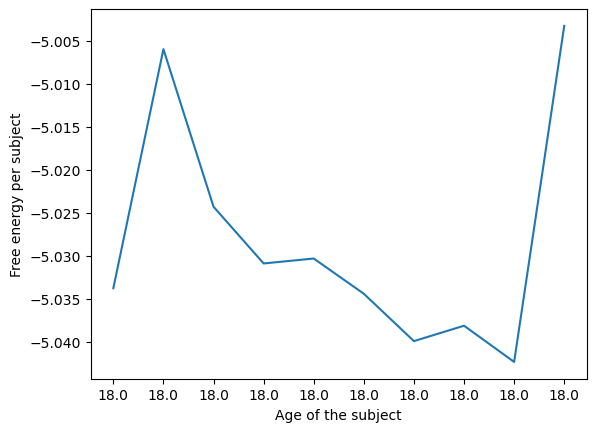

In [78]:
# Compute free energy vs time/subjects
data = sorted_matrices[:10]
energy_list = []

for i in range(len(data)):
    energy = free_energy(data[i], 1)
    energy_list.append(energy)

x_values = list(range(len(data)))
plt.plot(x_values, energy_list)
plt.xticks(x_values, sorted_ages[:10])
plt.ylabel('Free energy per subject')
plt.xlabel('Age of the subject')
plt.show()